In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


## 데이터 불러오기

In [2]:
import pandas as pd
df=pd.read_csv('auto.csv')

In [3]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## Categorical Feature 처리하기

In [4]:
import seaborn as sns
df['origin'].unique()

array([1, 3, 2])

In [5]:
origin = df.pop('origin')

In [6]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,8,307.0,130.0,3504.0,12.0,70,18.0
1,8,350.0,165.0,3693.0,11.5,70,15.0
2,8,318.0,150.0,3436.0,11.0,70,18.0
3,8,304.0,150.0,3433.0,12.0,70,16.0
4,8,302.0,140.0,3449.0,10.5,70,17.0
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0
388,4,97.0,52.0,2130.0,24.6,82,44.0
389,4,135.0,84.0,2295.0,11.6,82,32.0
390,4,120.0,79.0,2625.0,18.6,82,28.0


In [7]:
df['USA']=(origin==1)*1.0
df['Europe']=(origin==2)*1.0
df['Japan']=(origin==3)*1.0

## 다른방법

In [8]:
df=pd.read_csv('auto.csv')
df=pd.get_dummies(df, columns=['origin'], prefix='origin',)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


## Input/Output(Label) 나누기

In [9]:
from sklearn.model_selection import train_test_split
y = df.pop('mpg')
X = df

In [10]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2)

## 데이터 정규화

In [48]:
mean = train_X.mean()
std = train_X.std()
train_X_std = (train_X - mean)/std
test_X_std = (test_X - mean)/std

## 회귀모형 만들기

In [25]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu',input_shape=[len(train_X_std.columns)]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse'])
    return model

In [26]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.predict(train_X_std[:10])

array([[0.4338615 ],
       [0.17865324],
       [0.24968976],
       [0.20949686],
       [0.21490371],
       [0.7577969 ],
       [0.26337573],
       [0.26242435],
       [0.31944776],
       [0.2830552 ]], dtype=float32)

## 모델 확인하기

In [28]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
    print('.', end='')
# history = model.fit(train_X, train_y, epochs=1000, )
model = build_model()
history = model.fit(train_X_std, train_y, epochs=1000, validation_split = 0.2, verbose = 0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

## 모델 성능 플로팅하기

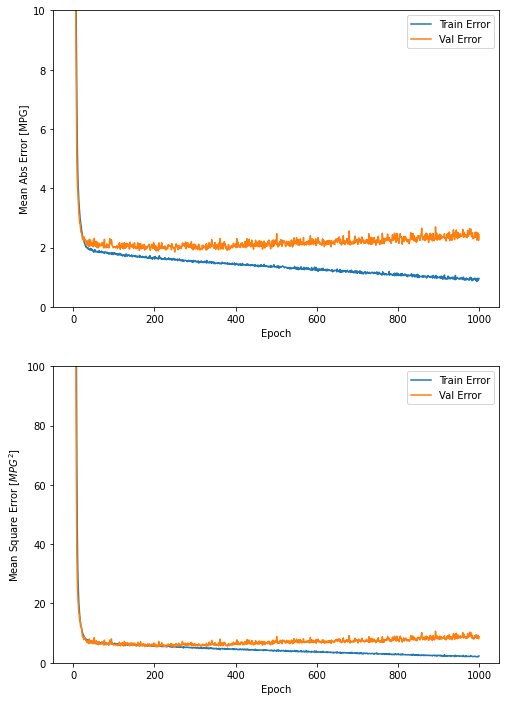

In [29]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

plot_history(history)

In [30]:
train_X_std

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
348,-0.846212,-0.907690,-1.014138,-0.687801,1.910190,1.357492,0.766127,-0.450771,-0.501193
163,1.523939,0.653939,0.163449,0.318048,-0.744966,-0.268382,0.766127,-0.450771,-0.501193
262,1.523939,1.034824,0.922339,0.298912,-1.593141,0.544555,0.766127,-0.450771,-0.501193
227,1.523939,1.967992,1.995252,1.512868,-1.630018,0.273576,0.766127,-0.450771,-0.501193
223,0.338864,0.539673,0.163449,0.675657,0.324472,0.273576,0.766127,-0.450771,-0.501193
...,...,...,...,...,...,...,...,...,...
308,-0.846212,-0.993389,-1.144981,-1.180559,1.209524,1.086513,-1.301096,-0.450771,1.988863
143,-0.846212,-1.050521,-1.118813,-1.138699,1.283278,-0.539360,-1.301096,-0.450771,1.988863
230,1.523939,1.501408,1.184025,1.650410,-0.376194,0.273576,0.766127,-0.450771,-0.501193
12,1.523939,1.967992,1.210194,0.963897,-2.220053,-1.623276,0.766127,-0.450771,-0.501193


## Early Stopping 확인


...............................................

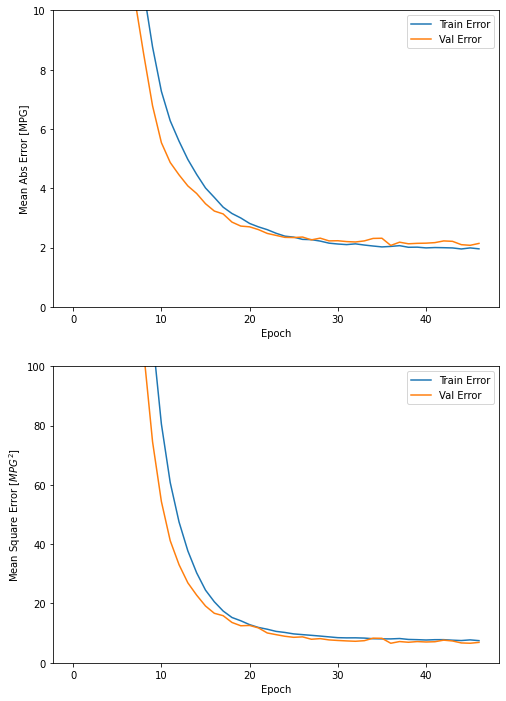

In [34]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_X_std, train_y, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

## Prediction on Testing Data

In [56]:
y_pred=model.predict(test_X_std)
y_pred=y_pred.flatten()

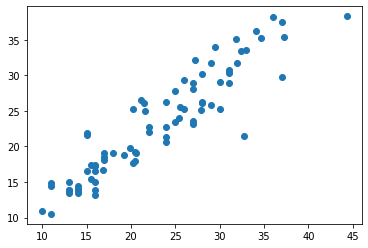

In [57]:
plt.scatter(test_y, y_pred)

(array([ 3.,  8., 14., 24., 17.,  9.,  1.,  2.,  0.,  1.]),
 array([-6.89014435, -5.07317532, -3.25620628, -1.43923725,  0.37773178,
         2.19470081,  4.01166985,  5.82863888,  7.64560791,  9.46257694,
        11.27954597]),
 <BarContainer object of 10 artists>)

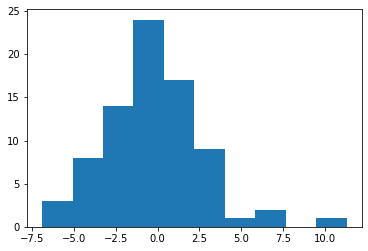

In [58]:
plt.hist(test_y-y_pred)

## Standardize 하지 않고 학습
## 모델을 